In [1]:
import warnings
# For ignoring warnings printed by R magic commands
warnings.filterwarnings('ignore') 

### Load R magic

This is what enables sharing dataframe from python to R.

In [2]:
%load_ext rpy2.ipython

### Load Python libraries

e.g., Pandas and more.

In [3]:
import pandas as pd

### Install or load R libraries and helper functions

The `%%R` magic command allows you to easily swtich between python and R runtime.

In [4]:
%%R
# Load R libraries
library(ggplot2)
library(RColorBrewer)
library(stringr)
library(grid)
library(gridExtra)

In [5]:
%%R
# Install the ggthemes package (you have to do it only once)
install.packages("ggthemes", repos = "http://cran.us.r-project.org")
library(ggthemes)

R[write to console]: trying URL 'http://cran.us.r-project.org/src/contrib/ggthemes_4.2.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 423927 bytes (413 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

In [6]:
%%R 
# Helper functions
plot_theme <- theme_hc(base_size = 15) +
              theme(plot.title = element_text(hjust = 0.5),
                    legend.position = "bottom", legend.title = element_blank())
plot_color <- scale_colour_brewer(palette = "Set1")

### Example 1: Plotting CDF

In [7]:
# Load latencies.csv file
pd_latencies = pd.read_csv('latencies.csv', sep=',')
pd_latencies.head()

Latency        Type
0   0.0370  Lambda-NIC
1   0.0373  Lambda-NIC
2   0.0380  Lambda-NIC
3   0.0380  Lambda-NIC
4   0.0380  Lambda-NIC

#### Use the `-i` flag to pass the pandas frame in python to R

The pandas frame will appear as a native data frame in R, which you can use to plot results and more.

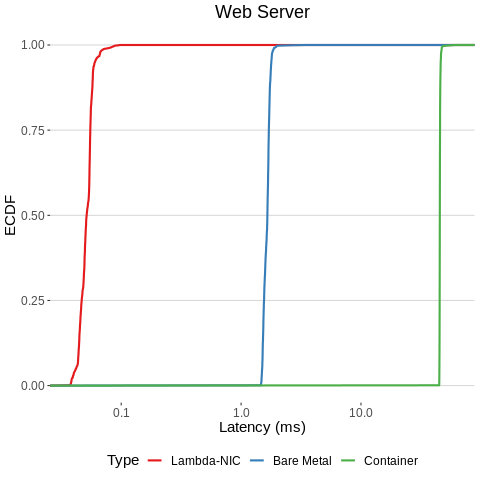

In [8]:
%%R -i pd_latencies

pd_latencies$Type <- factor(pd_latencies$Type, 
                            levels = c("Lambda-NIC", "Bare Metal", "Container"))

pd_latencies_plot <- ggplot(pd_latencies, aes(x=Latency, colour=Type)) + 
    geom_line(stat = "ecdf", size=1) +
    scale_x_continuous(trans = "log10") +
    labs(y = "ECDF", x = "Latency (ms)") +
    ggtitle("Web Server") +
    theme_hc(base_size = 15) +
    theme(plot.title = element_text(hjust = 0.5)) +
    plot_color

pd_latencies_plot